In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from google.colab import drive
import pickle


In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv("drive/MyDrive/segmentation data.csv")
data.drop('ID', axis = 1, inplace = True )


<ipython-input-63-5004d1c43d53>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data= data, x= data['Age'], y = data['Income'], palette="red")


<Axes: xlabel='Age', ylabel='Income'>

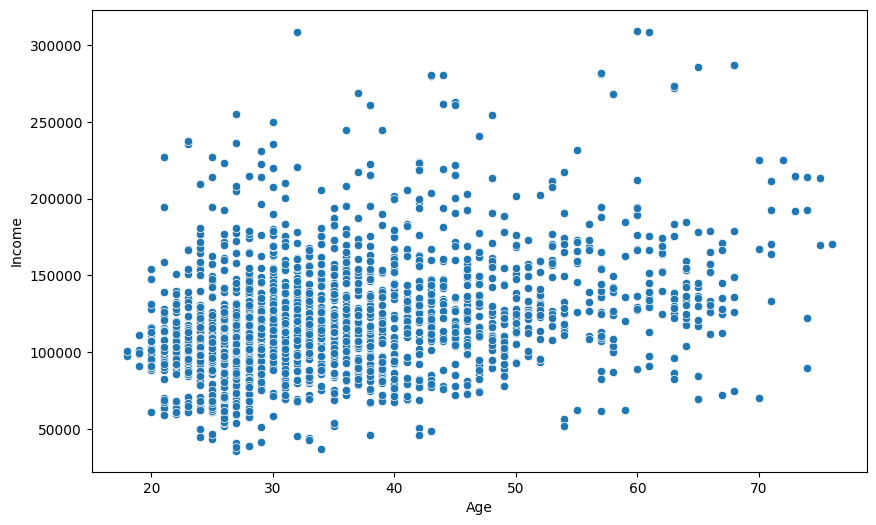

In [ ]:
plt.figure(figsize =(10,6))

sns.scatterplot(data= data, x= data['Age'], y = data['Income'], palette="red")


In [ ]:
ss = StandardScaler()
std_data = ss.fit_transform(data)

In [ ]:
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init= "k-means++",random_state=42 ).fit(std_data)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'WCSS vs No of Clusters')

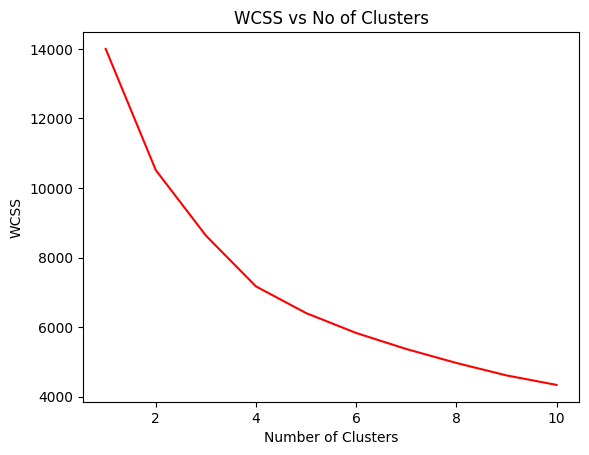

In [ ]:
plt.plot(range(1,11),wcss, color ="red")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS vs No of Clusters")


In [ ]:
kmeans = KMeans(n_clusters= 4, init= 'k-means++',random_state= 42)
kmeans.fit(std_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [ ]:
data['Customer Segment'] = kmeans.labels_

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [ ]:
data.groupby(['Customer Segment']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Customer Segment,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


For Segment 0, avg age is 35 , education is high school , income is 2nd highest, occupation is self employed or officer / business




<Axes: xlabel='Age', ylabel='Income'>

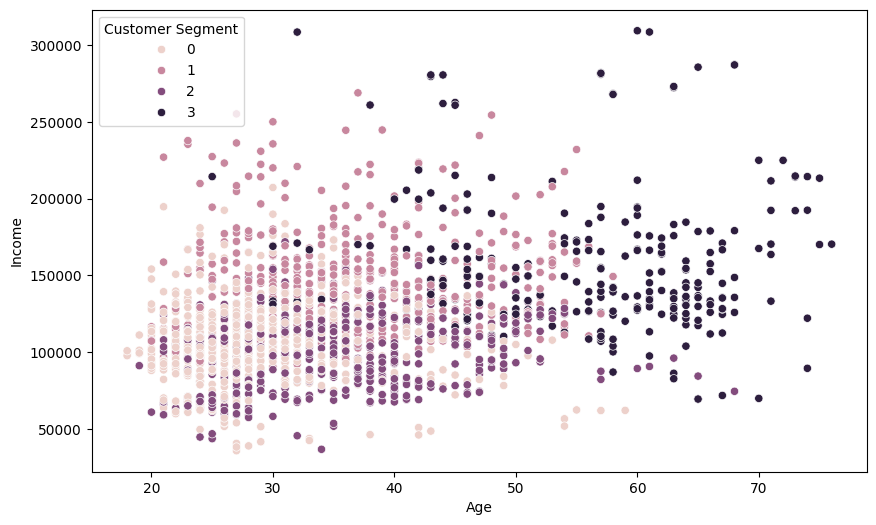

In [ ]:
plt.figure(figsize =(10,6))

sns.scatterplot(data= data, x= data['Age'], y = data['Income'], hue = data["Customer Segment"])


### We see that there's no clear distinction in clusters only the 2nd segment is clearly seperated. We induce PCA.

In [ ]:
pca = PCA()
pca.fit(std_data)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

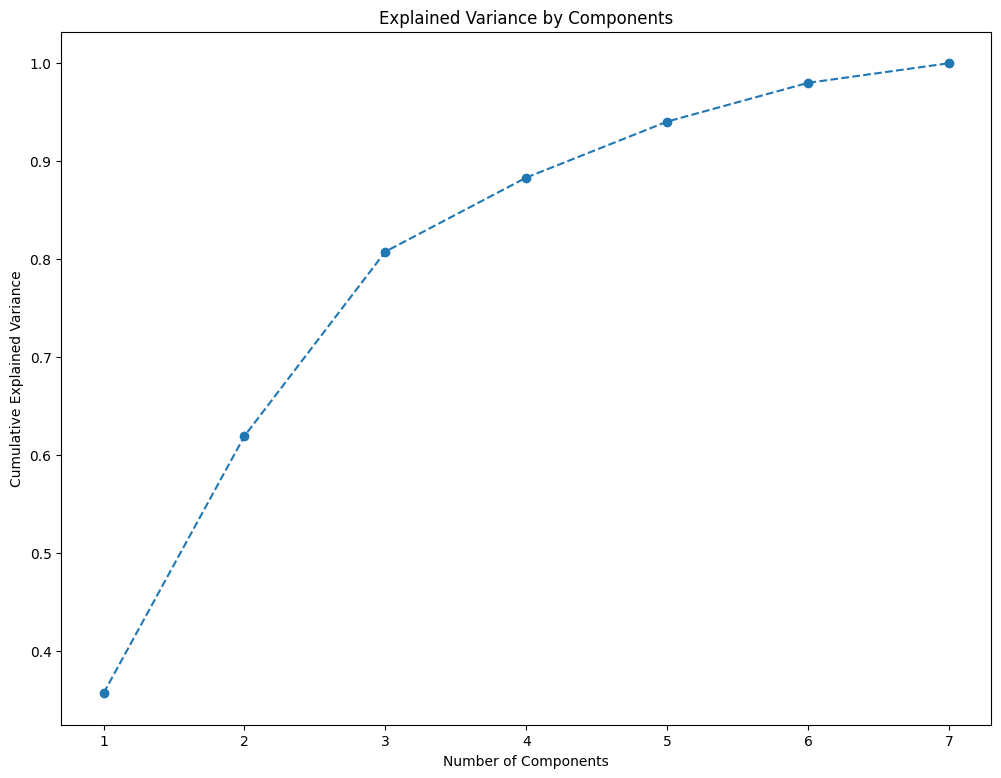

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components= 3)
pca.fit(std_data)

PCA(n_components=3)

In [ ]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [ ]:
pca_data = pd.DataFrame(data =pca.components_,
                        columns = ['Sex','Marital status', 'Age', 'Education','Income', 'Occupation','Settlement size'],
                        index = [ 'Component1','Component2','Component3'])

<Axes: >

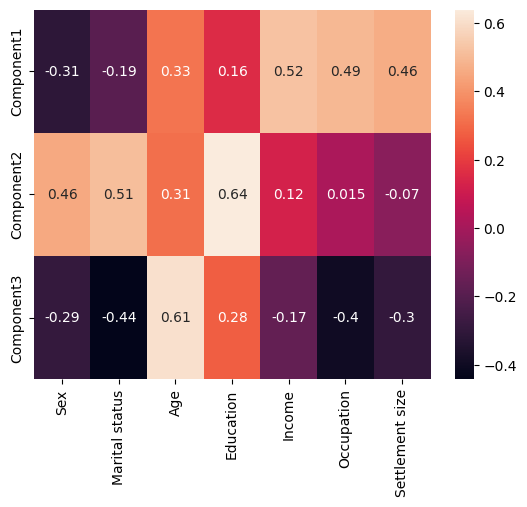

In [ ]:
sns.heatmap(pca_data, annot = True)

From the above graph we can clearly say that Component 1 is related to Career,
Component 2 is more of Education and Lifestyle and Component 3 is more of like
senior and married people.

In [ ]:
scores_pca = pca.transform(std_data)

In [ ]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

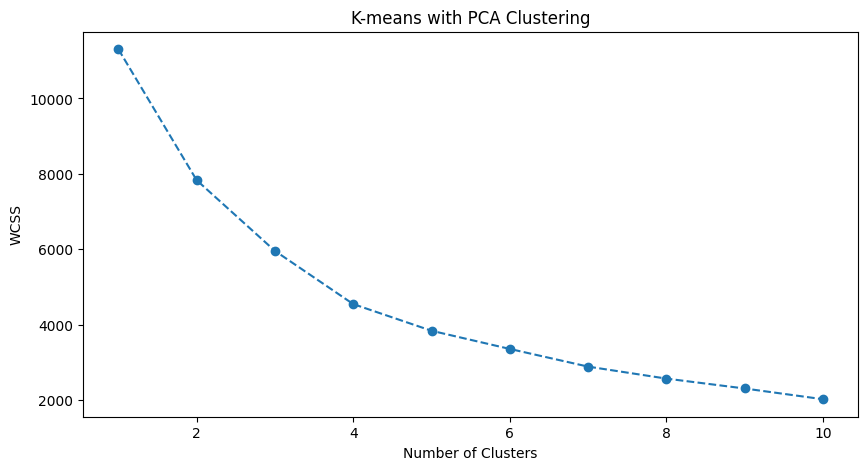

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [ ]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,0.063584,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.029160,1.372663,-1.046172,-0.248046
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,2.984906,1.687328,2.031200,0.844039
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,1.843478,-1.046406,-0.902963,1.003644


In [ ]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',
                                                          1:'career focused',
                                                          2:'well-off',
                                                          3:'fewer opportunities'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,0.063584,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.029160,1.372663,-1.046172,-0.248046,583,0.2915
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,2.984906,1.687328,2.031200,0.844039,265,0.1325
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,1.843478,-1.046406,-0.902963,1.003644,460,0.2300


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'well-off',
                                                          3:'fewer opportunities'})

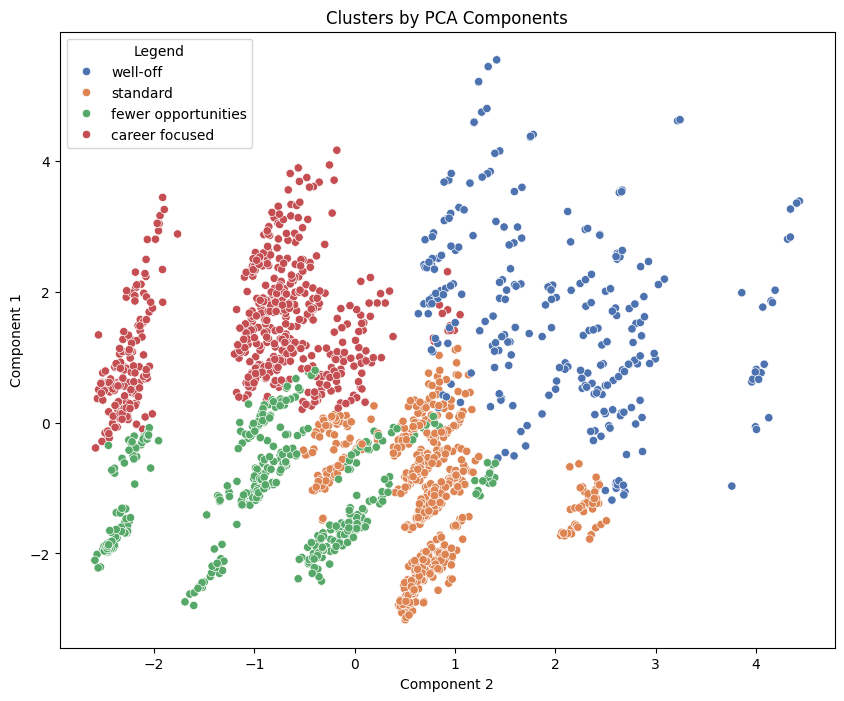

In [ ]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_segm_pca_kmeans, x = df_segm_pca_kmeans['Component 2'], y = df_segm_pca_kmeans['Component 1'] , hue = df_segm_pca_kmeans['Legend'],
                palette = "deep")
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
pickle.dump(ss, open('/content/drive/MyDrive/ss.pickle', 'wb'))
pickle.dump(pca, open('/content/drive/MyDrive/pca.pickle', 'wb'))
pickle.dump(kmeans_pca , open('/content/drive/MyDrive/kmeans_pca.pickle', 'wb'))
